In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import seaborn as sns

# 1. Read in residual heatmap and client boolean masks

In [129]:
# Heatmap
resid_map = pd.read_csv('../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Masks for clients
clients = np.loadtxt('../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_clients = np.loadtxt('../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_clients = np.loadtxt('../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_clients = np.loadtxt('../../utils/analysis_utils/dependent_clients.csv').astype(bool)

strong_ihb_clients = strong_clients & ihb_clients
strong_dep_clients = strong_clients & dep_clients

# 2. Read in CA coordinates

In [8]:
cd_cas = np.loadtxt('../../PyMOL/interface_atoms/2src_cd_CA.txt')
sh2_int_cas = np.loadtxt('../../PyMOL/interface_atoms/sh2_interface_ca.txt')
sh3_int_cas = np.loadtxt('../../PyMOL/interface_atoms/sh3_interface_ca.txt')

# 3. Calculate minimum CA-interface distances for each position

In [9]:
def get_distance(p1, p2):
    distance = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)
    return(distance)

In [55]:
sh2_distances = []
sh3_distances = []
for pos in cd_cas:
    
    sh2_interface_distances = []
    for atom in sh2_int_cas:
        sh2_interface_distances.append(get_distance(pos, atom))
    min_sh2_dist = min(sh2_interface_distances)
    
    sh3_interface_distances = []
    for atom in sh3_int_cas:
        sh3_interface_distances.append(get_distance(pos, atom))
    min_sh3_dist = min(sh3_interface_distances)
    
    sh2_distances.append(min_sh2_dist)
    sh3_distances.append(min_sh3_dist)
    
sh2_distances = np.array(sh2_distances)
sh3_distances = np.array(sh3_distances)

# 4. Analysis by number of clients

In [130]:
# Count clients by position
all_by_pos = np.sum(~np.isnan(resid_map.values), axis=1)

def get_client_number_by_pos(resid_map, client_mask):
    client_by_pos = (resid_map * client_mask)
    client_by_pos[client_by_pos==0.0] = np.nan
    client_by_pos = np.sum(~np.isnan(client_by_pos), axis=1)
    return(client_by_pos)

client_by_pos = get_client_number_by_pos(resid_map.values, clients)
ihb_client_by_pos = get_client_number_by_pos(resid_map.values, ihb_clients)
dep_client_by_pos = get_client_number_by_pos(resid_map.values, dep_clients)
strong_ihb_by_pos = get_client_number_by_pos(resid_map.values, strong_ihb_clients)
strong_dep_by_pos = get_client_number_by_pos(resid_map.values, strong_dep_clients)

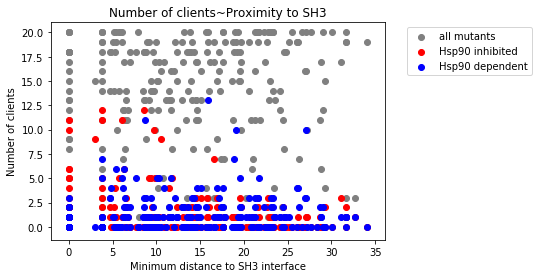

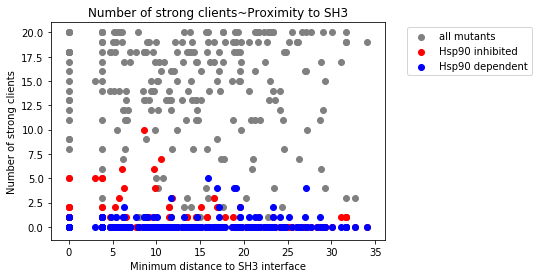

In [131]:
plt.scatter(sh3_distances[:, 0], all_by_pos, color='gray', label='all mutants')
plt.scatter(sh3_distances[:, 0], ihb_client_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(sh3_distances[:, 0], dep_client_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to SH3 interface')
plt.ylabel('Number of clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of clients~Proximity to SH3')
plt.show()

plt.scatter(sh3_distances[:, 0], all_by_pos, color='gray', label='all mutants')
plt.scatter(sh3_distances[:, 0], strong_ihb_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(sh3_distances[:, 0], strong_dep_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to SH3 interface')
plt.ylabel('Number of strong clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of strong clients~Proximity to SH3')
plt.show()

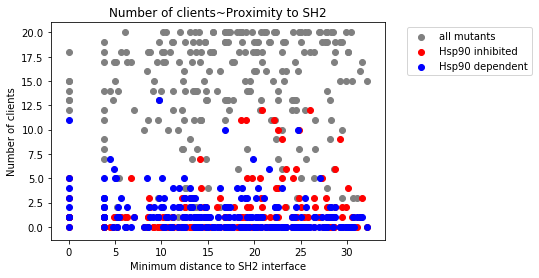

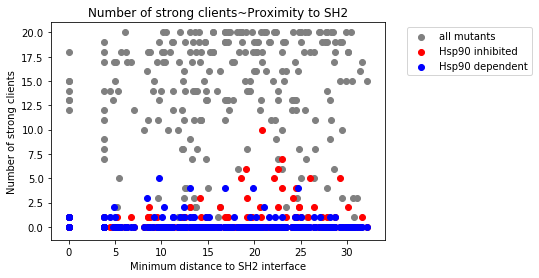

In [132]:
plt.scatter(sh2_distances[:, 0], all_by_pos, color='gray', label='all mutants')
plt.scatter(sh2_distances[:, 0], ihb_client_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(sh2_distances[:, 0], dep_client_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to SH2 interface')
plt.ylabel('Number of clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of clients~Proximity to SH2')
plt.show()

plt.scatter(sh2_distances[:, 0], all_by_pos, color='gray', label='all mutants')
plt.scatter(sh2_distances[:, 0], strong_ihb_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(sh2_distances[:, 0], strong_dep_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to SH2 interface')
plt.ylabel('Number of strong clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of strong clients~Proximity to SH2')
plt.show()

# 5. Analysis by average residual score

In [114]:
np.nanmean(resid_map.values, axis=1).shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


(250,)

In [134]:
# Average residual by position
pos_mean = np.nanmean(resid_map.values, axis=1)
pos_mean_abs = np.nanmean(abs(resid_map.values), axis=1)
"""def get_client_number_by_pos(resid_map, client_mask):
    client_by_pos = (resid_map * client_mask)
    client_by_pos[client_by_pos==0.0] = np.nan
    client_by_pos = np.sum(~np.isnan(client_by_pos), axis=1)
    return(client_by_pos)

client_by_pos = get_client_number_by_pos(resid_map.values, clients)
ihb_client_by_pos = get_client_number_by_pos(resid_map.values, ihb_clients)
dep_client_by_pos = get_client_number_by_pos(resid_map.values, dep_clients)"""

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


'def get_client_number_by_pos(resid_map, client_mask):\n    client_by_pos = (resid_map * client_mask)\n    client_by_pos[client_by_pos==0.0] = np.nan\n    client_by_pos = np.sum(~np.isnan(client_by_pos), axis=1)\n    return(client_by_pos)\n\nclient_by_pos = get_client_number_by_pos(resid_map.values, clients)\nihb_client_by_pos = get_client_number_by_pos(resid_map.values, ihb_clients)\ndep_client_by_pos = get_client_number_by_pos(resid_map.values, dep_clients)'

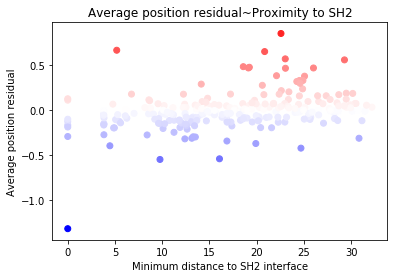

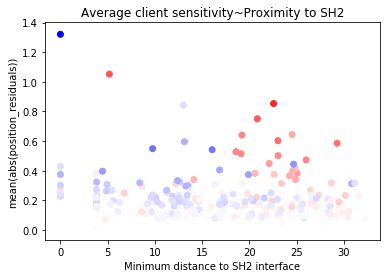

In [158]:
plt.scatter(sh2_distances[:, 0], pos_mean, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to SH2 interface')
plt.ylabel('Average position residual')
plt.title('Average position residual~Proximity to SH2')
plt.show()

plt.scatter(sh2_distances[:, 0], pos_mean_abs, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to SH2 interface')
plt.ylabel('mean(abs(position_residuals))')
plt.title('Average client sensitivity~Proximity to SH2')
plt.show()

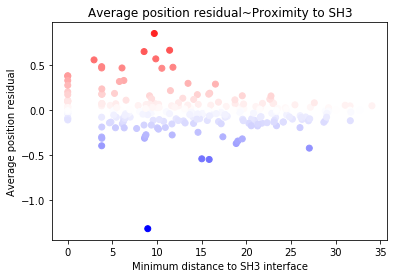

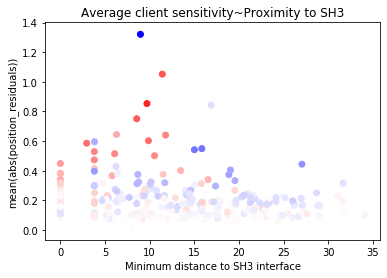

In [159]:
plt.scatter(sh3_distances[:, 0], pos_mean, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to SH3 interface')
plt.ylabel('Average position residual')
plt.title('Average position residual~Proximity to SH3')
plt.show()

plt.scatter(sh3_distances[:, 0], pos_mean_abs, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to SH3 interface')
plt.ylabel('mean(abs(position_residuals))')
plt.title('Average client sensitivity~Proximity to SH3')
plt.show()

In [160]:
active_site=[
281, 280, 278, 298, 284,
296, 276, 341, 342, 326,
344, 396, 343, 345, 351,
394, 391, 389, 407
]
'+'.join(str(x) for x in active_site)

'281+280+278+298+284+296+276+341+342+326+344+396+343+345+351+394+391+389+407'